<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/ROC_penguins_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing datasets
df = pd.read_csv("penguins.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe(include = ["object"])

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


**NULL** **VALUES**

In [6]:
df.isna().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


**BOX PLOT**

<Axes: ylabel='body_mass_g'>

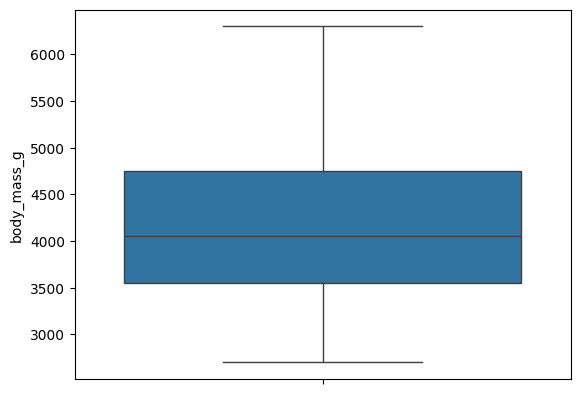

In [9]:
sns.boxplot(df["body_mass_g"])

<Axes: ylabel='flipper_length_mm'>

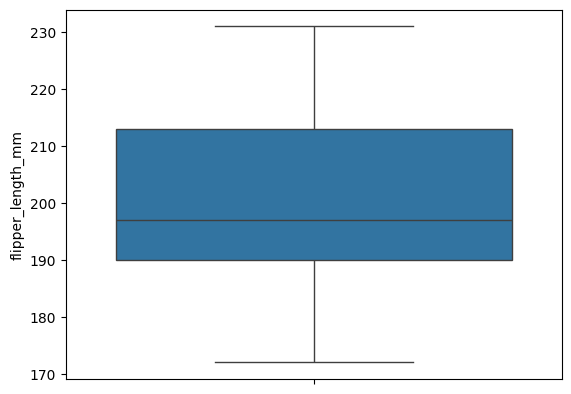

In [12]:
sns.boxplot(df["flipper_length_mm"])

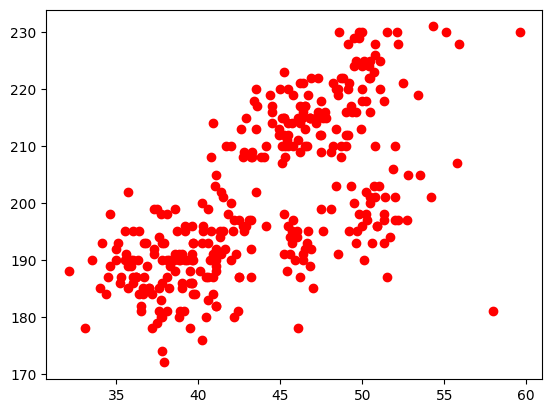

In [16]:
plt.scatter(df["culmen_length_mm"],df["flipper_length_mm"],color='red')

  HANDLING NULL VALUES

In [17]:
df1 = df.copy()
df1 = df1.dropna(axis = 0)
df1.isna().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [18]:
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


**CHANGING MALE  AS 1 AND FEMALE AS** **0**

In [20]:
df1["sex"] = df["sex"].apply(lambda x: 1 if  x == "MALE" else 0 )

In [21]:
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


In [22]:
df1["sex"].unique()

array([1, 0])

In [23]:
df1["sex"].value_counts()

,count
sex,
1,168
0,166


In [24]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**Test and Train dataset split**

In [26]:
x = df1[["culmen_length_mm","flipper_length_mm"]]
y = df1["sex"].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

**MODEL**

In [28]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [30]:
x_predict_test = model.predict(x_test)
x_predict_test

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0])

In [34]:
x_predict_train = model.predict(x_train)
x_predict_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1])

**Calculating probabilities**

In [35]:
x_test_proba = model.predict_proba(x_test)[:,1]
x_test_proba

array([0.43961382, 0.31238453, 0.31351035, 0.5885311 , 0.69080734,
       0.63431367, 0.46649731, 0.27281738, 0.24970333, 0.69467381,
       0.47401113, 0.41949923, 0.27868199, 0.28708629, 0.22767145,
       0.27132062, 0.26983571, 0.42244839, 0.72505753, 0.41931355,
       0.29548845, 0.30163825, 0.55011921, 0.66851561, 0.70228925,
       0.5764324 , 0.6880826 , 0.65604737, 0.35956252, 0.39945755,
       0.57089558, 0.33396889, 0.55885519, 0.30148478, 0.6584294 ,
       0.34990491, 0.42556464, 0.43554363, 0.5733057 , 0.30132422,
       0.5415163 , 0.32547186, 0.71780419, 0.49923617, 0.54488005,
       0.63484414, 0.37479459, 0.70574256, 0.40271396, 0.404525  ,
       0.3630427 , 0.37426664, 0.48586586, 0.3918888 , 0.73237005,
       0.31579055, 0.32398926, 0.3917071 , 0.3502519 , 0.68141435,
       0.37267666, 0.67433612, 0.34155303, 0.66902236, 0.45433589,
       0.30164539, 0.27822918])

In [36]:
x_train_proba = model.predict_proba(x_train)[:,1]
x_train_proba

array([0.56312444, 0.37479459, 0.37602234, 0.53814876, 0.68205409,
       0.48623837, 0.71149102, 0.53515715, 0.61345832, 0.42944231,
       0.56739267, 0.36460762, 0.70900811, 0.34478051, 0.58834643,
       0.57864019, 0.56664384, 0.6773135 , 0.2136754 , 0.63676288,
       0.67928064, 0.63571183, 0.34562701, 0.31318951, 0.80610129,
       0.28417155, 0.37108943, 0.66298397, 0.42134076, 0.64954905,
       0.46913825, 0.67548495, 0.38188066, 0.29126953, 0.54301365,
       0.59579902, 0.54993887, 0.37074148, 0.68223412, 0.33145957,
       0.77783294, 0.39458559, 0.35506419, 0.60520547, 0.44166453,
       0.79256985, 0.58834643, 0.38812761, 0.20008325, 0.29345711,
       0.69241926, 0.26364476, 0.25884721, 0.7348702 , 0.48228982,
       0.55700787, 0.41529202, 0.56609866, 0.36600631, 0.45005018,
       0.55161174, 0.55719602, 0.64405211, 0.73206438, 0.27928872,
       0.44686899, 0.71226608, 0.28770402, 0.70024096, 0.546573  ,
       0.68287298, 0.69114746, 0.36723004, 0.86402127, 0.41035

**LOGISTIC SUMMARY**

In [37]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
logit_model = sm.Logit(y,x1)
L = logit_model.fit()
L.summary()

Optimization terminated successfully.
         Current function value: 0.631032
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  334
Model:                          Logit   Df Residuals:                      331
Method:                           MLE   Df Model:                            2
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                 0.08959
Time:                        13:59:11   Log-Likelihood:                -210.76
converged:                       True   LL-Null:                       -231.51
Covariance Type:            nonrobust   LLR p-value:                 9.831e-10
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.8786      1.721     -3.997      0.000     -10.251      -3.506
culmen_length_mm      0.1259      0.030      4.263      0.000       0.068       0.184
flipper_length_mm     0.0067      0.011      0.609      0.543      -0.015       0.028
=====================================================================================
"""

**ACCURACY SCORE**

In [38]:
from sklearn.metrics import accuracy_score
acc_Score = accuracy_score(y_test, x_predict_test)
acc_Score

0.6716417910447762

**CONFUSION MATRIX**

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, x_predict_test)

array([[28,  7],
       [15, 17]])

In [41]:
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, x_predict_test).ravel()

**CLASSIFICATION REPORT**

In [44]:
from sklearn.metrics import classification_report
cm = classification_report(y_test, x_predict_test)
print(cm)

              precision    recall  f1-score   support

           0       0.65      0.80      0.72        35
           1       0.71      0.53      0.61        32

    accuracy                           0.67        67
   macro avg       0.68      0.67      0.66        67
weighted avg       0.68      0.67      0.67        67



**ROC CURVE FOR TRAIN DATASET**

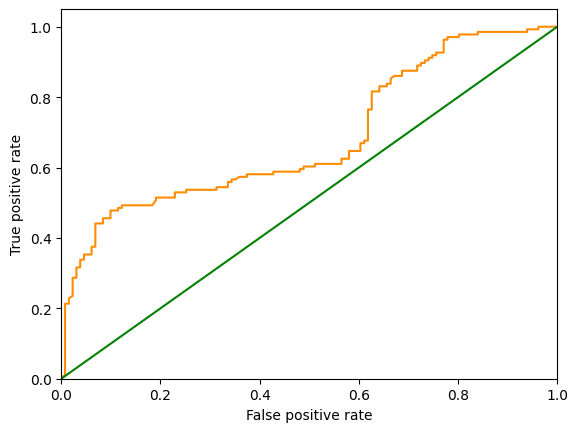

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
ROC = roc_auc_score(y_train, x_predict_train)
f1, f2, thresholds = roc_curve(y_train ,x_train_proba)
roc_auc =  auc(f1,f2)

plt.figure()
plt.plot(f1,f2,color="darkOrange",label="ROC_CURVE")
plt.plot([0,1],[0,1],"green")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

**ROC CURVE FOR TEST DATASET**

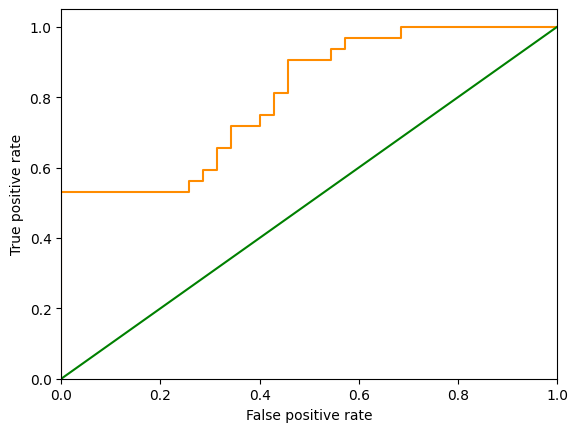

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
ROC = roc_auc_score(y_test, x_predict_test)
f1, f2, thresholds = roc_curve(y_test ,x_test_proba)
roc_auc =  auc(f1,f2)

plt.figure()
plt.plot(f1,f2,color="darkOrange",label="ROC_CURVE")
plt.plot([0,1],[0,1],"green")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()